# Fall 2022 Data Science Intern Challenge 

Please complete the following questions, and provide your thought process/work. You can attach your work in a text file, link, etc. on the application page. Please ensure answers are easily visible for reviewers!


<b> Question 1: Given some sample data, write a program to answer the following: click here to access the required data set

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of \$3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

#### A) Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. <br> </b>
We know that the Average order value (AOV) calculates the average spent every time a customer places an sneaker order.<br><br>
Formula:<br>
AOV = sum(order_amount)/ sum(total_items)<br><br>
<b>Problem: </b> Using Exploratory Data Analysis and Python libraries such as Pandas, Matplotlib, and Seaborn (which is explained in detail below), I identified the which was an outlier problem.
Earlier, AOV was being calculated as the mean of the 'order_amount' column. But It's value \\$3145.12) for a 30 day period was very high for a sneaker store. The explained code shows that an outlier with shop_id = 78 was commiting a fraud by charging \\$25725 for every pair of sneakers. Hence, the metrics which was selected as mean to calculate AOV was not appropriate as it was being affected by the values of outliers.<br><br>

<b>Better way to evaluate data:</b>
I presented two ways to evaluate the data after handling outlier. The first was either removing outliers and re-calculating the mean of 'order_amount' column as AOV.  However it wouldn't be an optimized approach.
Another approach which I would personally choose is using the <b>median</b> as the AOV or Average Order Value. Since it is the middle value of the sorted values, it is a central value but large and small outliers do not skew the median as much as the mean.



#### B) What metric would you report for this dataset? <br>
    The metric I would use is the Median for the 'order_amount' column.
    
#### C) What is its value? <br>
The calculated Median value is $284.0


## Explanation for Question 1

### Import Libraries and Load dataset

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df=pd.read_csv("Dataset.csv")
print('Shape of Data ->',df.shape,'\n')
df.head()

Shape of Data -> (5000, 7) 



,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


### Exploratory Data Analysis or EDA

In [78]:
# Check for Nulls and Duplicates
df.info()
print('\n\n', 'Checking for duplicates')
print(df[df.duplicated()])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        5000 non-null   int64 
 1   shop_id         5000 non-null   int64 
 2   user_id         5000 non-null   int64 
 3   order_amount    5000 non-null   int64 
 4   total_items     5000 non-null   int64 
 5   payment_method  5000 non-null   object
 6   created_at      5000 non-null   object
dtypes: int64(5), object(2)
memory usage: 273.6+ KB


 Checking for duplicates
Empty DataFrame
Columns: [order_id, shop_id, user_id, order_amount, total_items, payment_method, created_at]
Index: []


<b> Observation : </b>We can see that there are no null values and duplicates in the data. Hence, our data looks clean!

In [79]:
# Looking Closely at the order_amount column
df['order_amount'].describe()

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

### Observation:
<ul>
<li> We notice that the mean of the 'order_amount' column is \$3145.13 (which is the calculated AOV) which is very high for a shoe store. Hence we can conclude that some <b>outliers</b> might be affecting it's value.
<li> Also, Standard Deviation is also very large with it's value of \$41282.53. This means that data points are far from mean and therefore for calculating AOV, mean is not a good statistic. 
<li> Given that AOV is \$3145.13, we note that 75% of data is below 390 but the max value is $704000.0 which is very large. Hence AOV might be definitely affected by some outliers to give such a large Average Order Value.
    </ul>


## Outlier Detection

#### 1. BoxPlot

Text(0, 0.5, 'Order Amount')

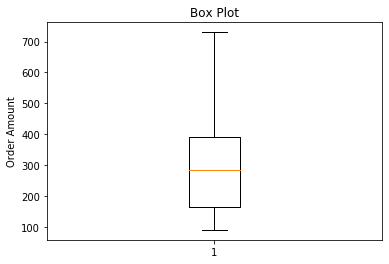

In [80]:
fig1, ax1 = plt.subplots()
ax1.set_title('Box Plot')
ax1.boxplot(df.order_amount,showfliers=False)
ax1.set_ylabel('Order Amount')


<b>Observation: </b>From boxplot it is visible that the maximum amount is very large as compared to the amount for the 3rd quartile hence there are visible chances of outliers. 

### 2. Price for each item
We check the price for each item to check if there is some descepancy in the amount charged for a particular shoe.


In [90]:
df['price_per_item'] = df['order_amount']/df['total_items']
a= list(df['price_per_item'].unique())
a= sorted(a,reverse=True)
print('Top 3 prices for each individual pair of sneakers')
print('Prices ->', a[:3],'\n')
print('The shop_id of the Outlier (the shop which is charging $25725.0 for a single pair of sneakers!): ')
print('Shop Id of Outlier->  ',df.loc[df['price_per_item']==25725.0].shop_id.unique())

Top 3 prices for each individual pair of sneakers
Prices -> [25725.0, 352.0, 201.0] 

The shop_id of the Outlier (the shop which is charging $25725.0 for a single pair of sneakers!): 
Shop Id of Outlier->   [78]


<b>Observation : </b>Yes! We have successfully detected the outlier using Exploratory Data Analysis and Boxplot. <br>
The Shop_id =78 is a fraud!

## Outlier Handling

1. Remove outliers and re-calculate AOV again
2. Use Median as a metric

<b>My approach : </b>I would use median as the AOV or Average Order Value. Since it is the middle value of the sorted values, it is a central value but large and small outliers do not skew the median as much as the mean.

In [85]:
# Calculating median of order amount
print('The median is : $', df.order_amount.median())

The median is : $ 284.0


<br><br><br><b>Question 2: For this question you’ll need to use SQL. Follow this link to access the data set required for the challenge. Please use queries to answer the following questions. Paste your queries along with your final numerical answers below.<br>

A) How many orders were shipped by Speedy Express in total?</b><br><br>
SELECT COUNT(*) FROM Orders <br>
JOIN Shippers ON Shippers.ShipperID = Orders.ShipperID<br>
WHERE Shippers.ShipperName = 'Speedy Express';<br><br>
<b>Answer:</b> 54



<br>




<b>B) What is the last name of the employee with the most orders?</b><br><br>
SELECT Employees.LastName, Count() AS num_orders FROM Orders <br>
JOIN Employees ON Orders.EmployeeID = Employees.EmployeeID <br>
GROUP BY Employees.LastName ORDER BY num_orders DESC; <br> <br>

<b>Answer:</b> Peacock (number of orders are 40)<br><br>
<b>C) What product was ordered the most by customers in Germany?</b><br><br>

SELECT Products.ProductName, Sum(OrderDetails.Quantity) as most_ordered FROM Orders <br>
JOIN OrderDetails ON Orders.OrderID = OrderDetails.OrderID<br>
JOIN Customers ON Orders.CustomerID = Customers.CustomerID<br>
JOIN Products ON OrderDetails.ProductID = Products.ProductID<br>
WHERE Country = 'Germany'<br>
GROUP BY Products.ProductName ORDER BY most_ordered DESC;<br><br>
<b>Answer:</b> Boston Crab Meat (with 160 orders)
